In [ ]:
#| label: Import-Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
#| label: Scatter-Plot
np.random.seed(123)
x = 2*np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)
plt.scatter(x,y)
plt.show()

In [ ]:
#| label: Linear-Algebra
# Create Intercept
X = np.hstack([np.ones((100,1)),x])
beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [ ]:
#| label: Scikit-Learn-Linear-Regression
#| include: false
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
# Time complexity is O(n^2), which is very slow 

In [ ]:
#| label: Gradient-Descent
#| include: false
# minimize the cost function(Loss function)
# Learning rate is small, it might take a longer time to converge, vice versa.
# When using Gradient Descent, you should ensure that all features have a similar scale
# Batch Gradient Descent: whole data set to update the step, fixed learning rate
# Stochastic Gradient Descent: random and single data to update the step Shuffile is very important
# Gradually reduce the learning rate. The steps start out large then get smaller and smaller
# Mini-Batch Gradient Descent: small random sets of instances 
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(x,y.reshape(-1))

In [ ]:
from IPython.display import Markdown
from tabulate import tabulate
table = [["Normal Equation", beta_hat[0][0], beta_hat[1][0]],
         ["SVD", lin_reg.intercept_[0], lin_reg.coef_[0][0]],
         ["SGD", sgd_reg.intercept_[0], sgd_reg.coef_[0]]
         ]
Markdown(tabulate(
  table, 
  headers=["Algorithm","Intercept", "Slope"]
))

In [ ]:
#| label: Predicted-Rgression
def abline(slope, intercept, color, label):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color)
plt.scatter(x,y)
abline(beta_hat[1][0], beta_hat[0][0], color = "r-", label = "Normal Equaation")
abline(lin_reg.coef_[0][0], lin_reg.intercept_[0], color = "y-", label = "SVD")
abline(sgd_reg.coef_[0], sgd_reg.intercept_[0], color = "g-", label = "SGD")
plt.show()

In [ ]:
#| label: Polynomial-Regression
# (100,1)
np.random.seed(123)
x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(100,1)

In [ ]:
#| label: Train-Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_square = poly_features.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(x_square, y)

In [ ]:
#| label: Prediction-Plot
plt.scatter(x,y)
plt.plot(np.sort(x, axis = 0), lin_reg.coef_[0][1]* np.sort(x, axis = 0)**2 + lin_reg.coef_[0][0]*np.sort(x, axis = 0) + lin_reg.intercept_[0], 
         color = 'red',label = "Predictions")
plt.legend()
plt.show()

In [ ]:
# Using learning curves can tell if the model is overfitting or underfitting
# Train the model several times on different sized subsets of the training set.
# Bias/Variance Tradeoff

In [ ]:
# Regularization
# Ridge Regression
# Lasso Regression
# Elastic Net
# Early Stopping: validation error has reached a minimum

In [ ]:
#| label: Logistic-Regression
from sklearn import datasets
iris = datasets.load_iris()
x = iris["data"][:,3:]
y = (iris["target"] == 2).astype(int)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x,y)

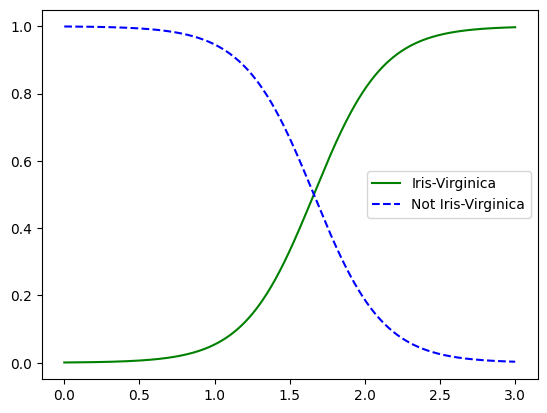

In [76]:
#| label: Logistic-Regression-Plot
# 2-D array
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:,1],"g-", label = "Iris-Virginica")
plt.plot(x_new, y_proba[:,0],"b--", label = "Not Iris-Virginica")
plt.legend()
plt.show()

(1000, 1)